# Network Analysis

In [10]:
import networkx as nx
import dynetx as dn
import pylab
import numpy as np
import collections
import matplotlib.pyplot as plt
import dynetx.algorithms as al
from sklearn.metrics import r2_score
import matplotlib.colors as mcolors
from conformity import attribute_conformity
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from wordcloud import WordCloud
from PIL import Image
import powerlaw
%matplotlib inline

In [11]:
list_graph = np.load('data\\list_graph_tresh.npy',allow_pickle='TRUE').item()
print(f'Number edges Normal = {len(list_graph[0].edges())} \t Number edges Bubble = {len(list_graph[1].edges())}' 
      f'\t Number edges Crash: {len(list_graph[2].edges())} \t Number edges Covid = {len(list_graph[3].edges())}')

Number edges Normal = 128 	 Number edges Bubble = 759	 Number edges Crash: 13063 	 Number edges Covid = 11940


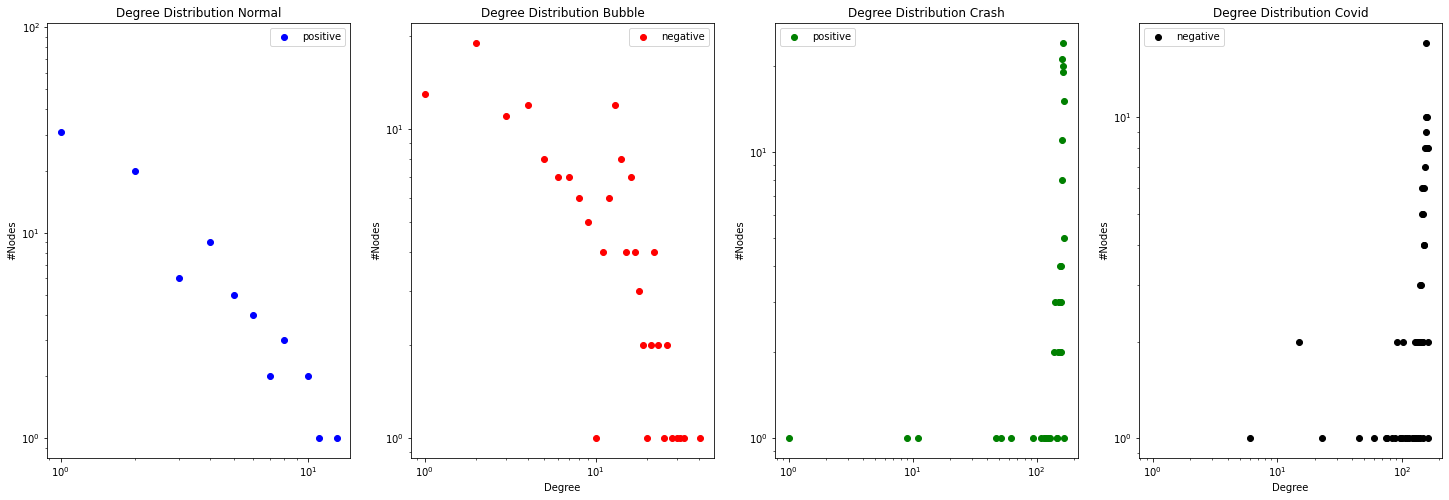

In [12]:
hist_normal = nx.degree_histogram(list_graph[0])
hist_bubble = nx.degree_histogram(list_graph[1])
hist_crash = nx.degree_histogram(list_graph[2])
hist_covid = nx.degree_histogram(list_graph[3])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(25, 8))
ax1.plot(range(0, len(hist_normal)),hist_normal, linestyle=" ", label = 'positive', marker = 'o', color = 'blue')
ax1.set_title('Degree Distribution Normal')
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('#Nodes')
ax2.plot(range(0, len(hist_bubble)),hist_bubble, linestyle=" ", label = 'negative', marker = 'o', color = 'red')
ax2.set_title('Degree Distribution Bubble')
ax2.set_xlabel('Degree')
ax2.set_ylabel('#Nodes')
ax2.legend()
ax2.loglog()
ax3.plot(range(0, len(hist_crash)),hist_crash, linestyle=" ", label = 'positive', marker = 'o', color = 'green')
ax3.set_title('Degree Distribution Crash')
ax3.legend()
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel('#Nodes')
ax4.plot(range(0, len(hist_covid)),hist_covid, linestyle=" ", label = 'negative', marker = 'o', color = 'black')
ax4.set_title('Degree Distribution Covid')
ax4.set_xlabel('Degree')
ax4.set_ylabel('#Nodes')
ax4.legend()
ax4.loglog()
plt.savefig("plots\\degree_distribution.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Fit Degree Distribution

In [13]:
def fit_power_law_linear(x, y, init):
    opt_parms, parm_cov =curve_fit(powerlaw_fun_linear, x, y, init,maxfev=1000)
    A, B  = opt_parms
    return A, B, parm_cov
def powerlaw_fun_linear(x, A, B):
    return A +B*x

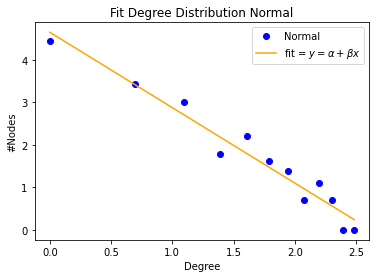

A: 4.65+-0.22, 	 B: -1.77+-0.12, 	 R2: 0.95, 	 chi: 0.9998978405755726


In [15]:
# Actual parameters
ydata = np.array(hist_normal)
ydata = np.log(ydata[ydata >0])
xdata = np.array(range(0, len(ydata)+1))
xdata = np.log(xdata[xdata >0])
init = (100,1.5)
A, B, parm_cov = fit_power_law_linear(xdata, ydata, init)
SE = np.sqrt(np.diag(parm_cov))
x_fit = np.linspace(min(xdata),max(xdata),10000)
fit_y = powerlaw_fun_linear(xdata, A, B )
y_fit = powerlaw_fun_linear(x_fit, A, B)
plt.plot(figsize=(20, 8))
plt.plot(xdata, ydata, marker = 'o', color = 'blue', label='Normal', linestyle=" ")
plt.plot(x_fit, y_fit, '-', label=r'fit = $y = \alpha + \beta x$'
         , color ='orange')
plt.legend()
plt.title('Fit Degree Distribution Normal')
plt.ylabel('#Nodes')
plt.xlabel('Degree')
plt.savefig("plots\\degree_distribution_normal.pdf", format="pdf", bbox_inches="tight")
plt.show()
R2 = r2_score(ydata,fit_y)
chisq = chisquare(f_obs = ydata, f_exp=fit_y)
print(f'A: {A:.2f}+-{SE[0]:.2f}, \t B: {B:.2f}+-{SE[1]:.2f}, \t R2: {R2:.2f}, \t chi: {chisq[1]:}')

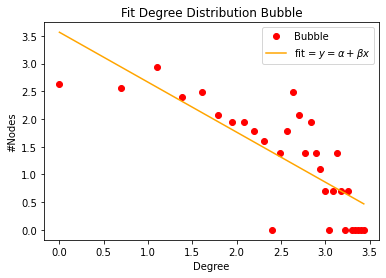

A: 3.56+-0.34, 	 B: -0.90+-0.13, 	 R2: 0.63, 	 chi: 0.999686065185438


In [16]:
# Actual parameters
ydata = np.array(hist_bubble)
ydata = np.log(ydata[ydata >0])
xdata = np.array(range(0, len(ydata)+1))
xdata = np.log(xdata[xdata >0])
init = (100,1.5)
A, B, parm_cov = fit_power_law_linear(xdata, ydata, init)
SE = np.sqrt(np.diag(parm_cov))
x_fit = np.linspace(min(xdata),max(xdata),10000)
fit_y = powerlaw_fun_linear(xdata, A, B )
y_fit = powerlaw_fun_linear(x_fit, A, B)
plt.plot(figsize=(20, 8))
plt.plot(xdata, ydata, marker = 'o', color = 'red', label='Bubble', linestyle=" ")
plt.plot(x_fit, y_fit, '-', label=r'fit = $y = \alpha + \beta x$'
         , color ='orange')
plt.legend()
plt.title('Fit Degree Distribution Bubble')
plt.ylabel('#Nodes')
plt.xlabel('Degree')
plt.savefig("plots\\degree_distribution_bubble.pdf", format="pdf", bbox_inches="tight")
plt.show()
R2 = r2_score(ydata,fit_y)
chisq = chisquare(f_obs = ydata, f_exp=fit_y)
print(f'A: {A:.2f}+-{SE[0]:.2f}, \t B: {B:.2f}+-{SE[1]:.2f}, \t R2: {R2:.2f}, \t chi: {chisq[1]:}')

## Clustering Coefficient and Density

In [17]:
density_normal = nx.density(list_graph[0])
density_bubble = nx.density(list_graph[1])
density_crash = nx.density(list_graph[2])
density_covid = nx.density(list_graph[3])
print(f'Normal density: {density_normal:.2f} \t Bubble density: {density_bubble:.2f}'
      f'\t Crash density: {density_crash:.2f} \t Covid density: {density_covid:.2f}')

Normal density: 0.01 	 Bubble density: 0.05	 Crash density: 0.91 	 Covid density: 0.85


In [18]:
CC_normal = nx.average_clustering(list_graph[0])
CC_bubble = nx.average_clustering(list_graph[1])
CC_crash = nx.average_clustering(list_graph[2])
CC_covid = nx.average_clustering(list_graph[3])
print(f'Global Clustering Coefficient Normal: {CC_normal:.3f} \t Global Clustering Coefficient Bubble: {CC_bubble:.3f}'
      f'\t Global Clustering Coefficient Crash: {CC_crash:.3f} \t Global Clustering Coefficient Covid: {CC_covid:.3f} ')

Global Clustering Coefficient Normal: 0.131 	 Global Clustering Coefficient Bubble: 0.369	 Global Clustering Coefficient Crash: 0.958 	 Global Clustering Coefficient Covid: 0.931 


In [19]:
list_clustering_normal = collections.defaultdict(list)
list_clustering_bubble = collections.defaultdict(list)
list_clustering_crash = collections.defaultdict(list)
list_clustering_covid = collections.defaultdict(list)
for node in list_graph[0].nodes():
    a = nx.clustering(list_graph[0])[node]
    list_clustering_normal[node] = a
    print(f'Done Normal {node}')
#np.save('normal_clustering.npy', list_clustering_normal) 
for node in list_graph[1].nodes():
    a = nx.clustering(list_graph[1])[node]
    list_clustering_bubble[node] = a
    print(f'Done Bubble {node}')
#np.save('bubble_clustering.npy', list_clustering_bubble)
for node in list_graph[2].nodes():
    a = nx.clustering(list_graph[2])[node]
    list_clustering_crash[node] = a
    print(f'Done Crash {node}')
#np.save('crash_clustering.npy', list_clustering_crash)
for node in list_graph[3].nodes():
    a = nx.clustering(list_graph[3])[node]
    list_clustering_covid[node] = a
    print(f'Done Covid {node}')
#np.save('covid_clustering.npy', list_clustering_covid) 

Done Normal CMCSA
Done Normal DIS
Done Normal F
Done Normal GPC
Done Normal GPS
Done Normal GT
Done Normal HAS
Done Normal HD
Done Normal HRB
Done Normal IPG
Done Normal JWN
Done Normal LEG
Done Normal LEN
Done Normal LOW
Done Normal MAT
Done Normal MCD
Done Normal NKE
Done Normal SHW
Done Normal TGT
Done Normal VFC
Done Normal WHR
Done Normal ADM
Done Normal CAG
Done Normal CL
Done Normal CPB
Done Normal CVS
Done Normal GIS
Done Normal HRL
Done Normal HSY
Done Normal K
Done Normal KMB
Done Normal KO
Done Normal KR
Done Normal MKC
Done Normal MO
Done Normal SYY
Done Normal TAP
Done Normal TSN
Done Normal WMT
Done Normal APA
Done Normal COP
Done Normal CVX
Done Normal HAL
Done Normal HES
Done Normal HP
Done Normal MRO
Done Normal MUR
Done Normal NBR
Done Normal SLB
Done Normal VLO
Done Normal WMB
Done Normal XOM
Done Normal AFL
Done Normal AIG
Done Normal AON
Done Normal AXP
Done Normal BAC
Done Normal BEN
Done Normal BK
Done Normal C
Done Normal CINF
Done Normal CMA
Done Normal EFX
Don

In [20]:
normal_clustering = np.load('normal_clustering.npy',allow_pickle='TRUE').item()
bubble_clustering = np.load('bubble_clustering.npy',allow_pickle='TRUE').item()
crash_clustering = np.load('crash_clustering.npy',allow_pickle='TRUE').item()
covid_clustering = np.load('covid_clustering.npy',allow_pickle='TRUE').item()

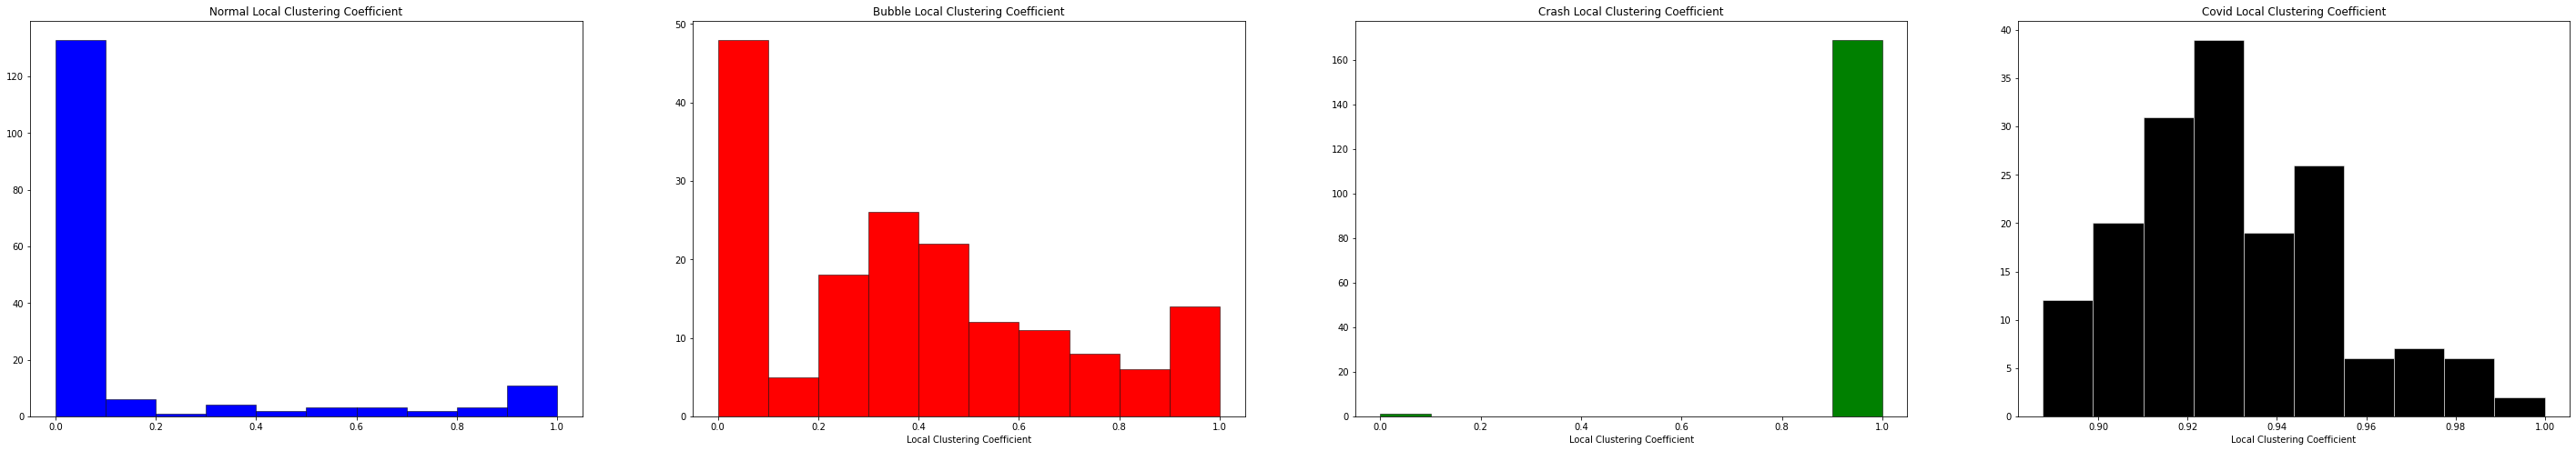

In [21]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(normal_clustering.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Local Clustering Coefficient')
ax2.hist(bubble_clustering.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Local Clustering Coefficient')
ax2.set_xlabel('Local Clustering Coefficient')
ax3.hist(crash_clustering.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Local Clustering Coefficient')
ax3.set_xlabel('Local Clustering Coefficient')
ax4.hist(covid_clustering.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Local Clustering Coefficient')
ax4.set_xlabel('Local Clustering Coefficient')
plt.savefig("plots\\local_clustering_coefficient.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [58]:
def get_label_percentage(dictionary, label):
    sum = 0
    for key in dictionary:
        sum += dictionary[key]
    return float(dictionary[label]) / float(sum)

In [22]:
def draw_net(G, measures, measure_name):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(15,15))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys(), edgecolors = 'black')
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.1, linscale=10, base=10))
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [60]:
def pie_chart_function(dictionary, name_file = None, title = None):
    sector = list (dictionary.keys()) 
    data = list (dictionary.values())
# Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
# Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%".format(pct, absolute)
 
# Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  labels = sector,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
    plt.setp(autotexts, size = 8, weight ="bold")
    ax.set_title(f"{title}")
    plt.savefig(f"plots\\pie_{name_file}.pdf", format="pdf", bbox_inches="tight")
# show plot
    plt.show()

### Closeness

In [23]:
closeness_normal = nx.closeness_centrality(list_graph[0])
closeness_bubble = nx.closeness_centrality(list_graph[1])
closeness_crash = nx.closeness_centrality(list_graph[2])
closeness_covid = nx.closeness_centrality(list_graph[3])
closeness_normal = {k: v for k, v in sorted(closeness_normal.items(), key=lambda item: item[1],reverse=True)}
closeness_bubble= {k: v for k, v in sorted(closeness_bubble.items(), key=lambda item: item[1],reverse=True)}
closeness_crash = {k: v for k, v in sorted(closeness_crash.items(), key=lambda item: item[1],reverse=True)}
closeness_covid = {k: v for k, v in sorted(closeness_covid.items(), key=lambda item: item[1],reverse=True)}

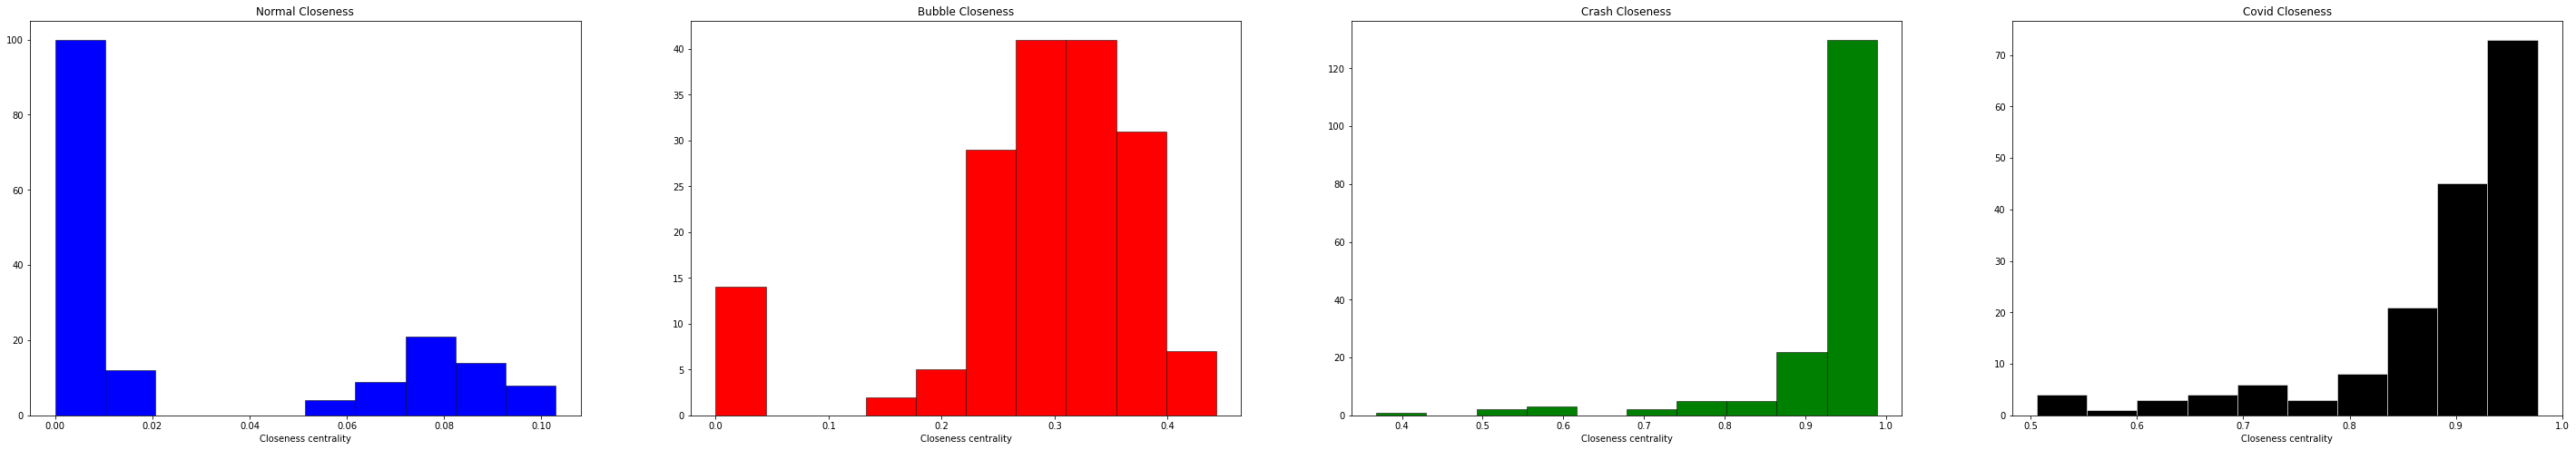

In [24]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(closeness_normal.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Closeness')
ax1.set_xlabel('Closeness centrality')
ax2.hist(closeness_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Closeness')
ax2.set_xlabel('Closeness centrality')
ax3.hist(closeness_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Closeness')
ax3.set_xlabel('Closeness centrality')
ax4.hist(closeness_covid.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Closeness')
ax4.set_xlabel('Closeness centrality')
plt.savefig("plots\\distribution_closeness.pdf", format="pdf", bbox_inches="tight")
plt.show()

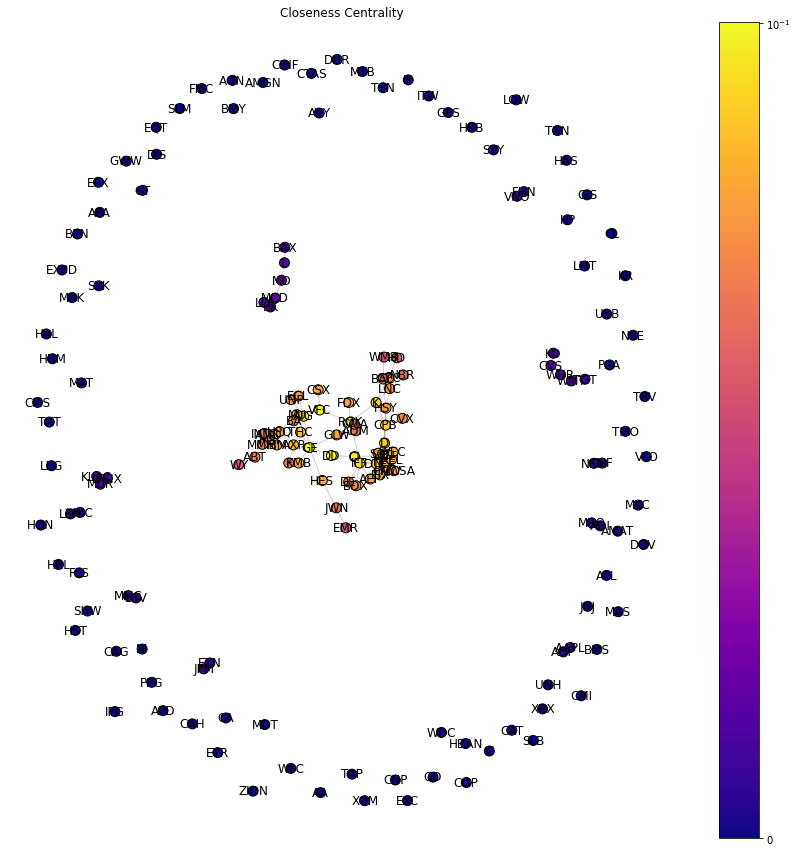

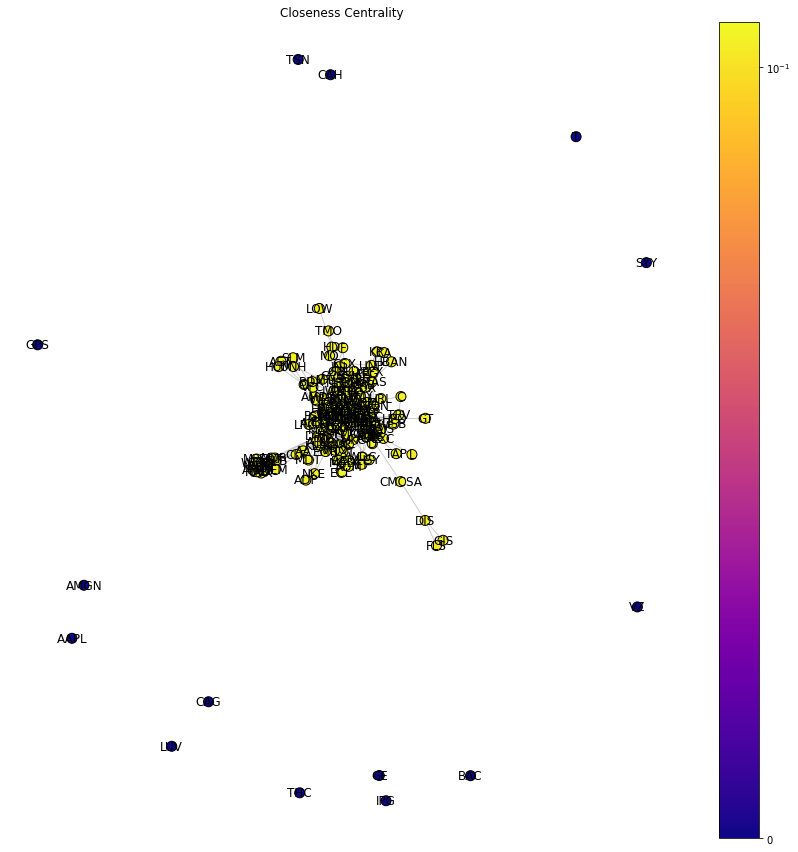

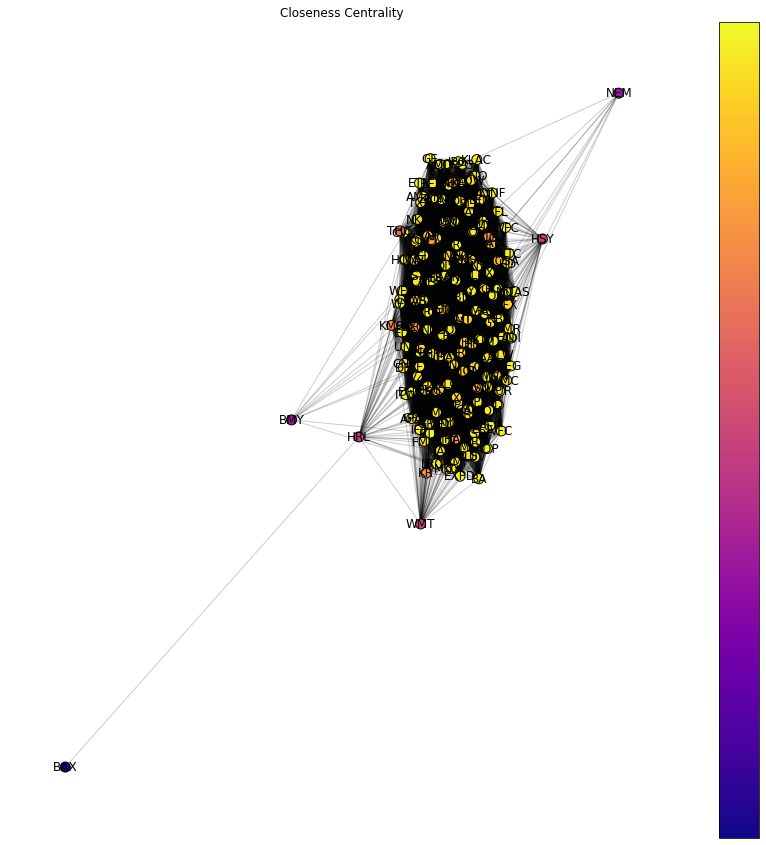

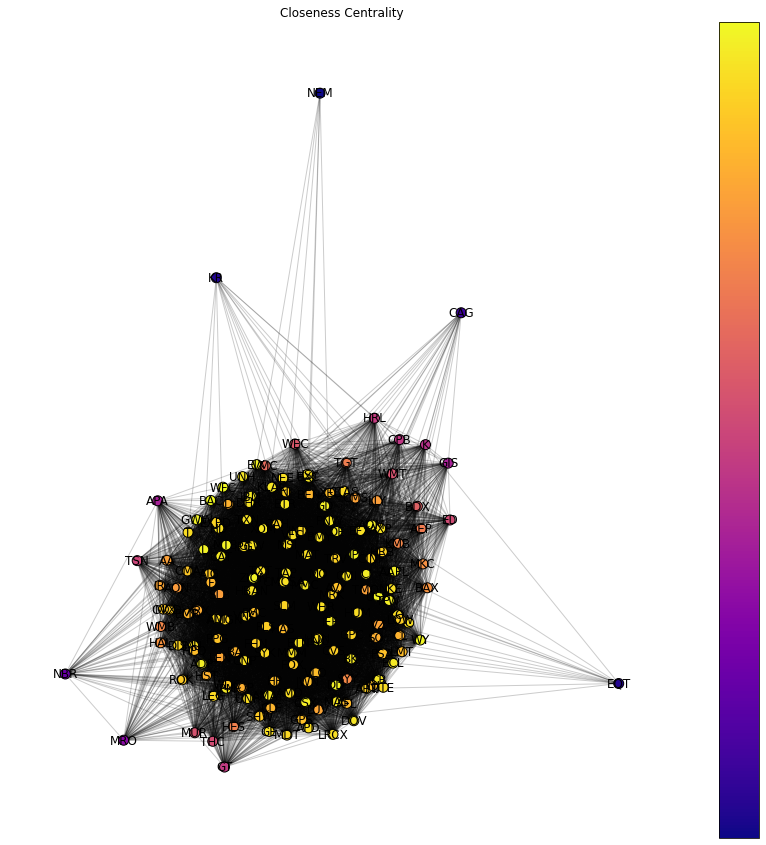

In [74]:
draw_net(list_graph[0], closeness_normal, 'Closeness Centrality')
draw_net(list_graph[1], closeness_bubble, 'Closeness Centrality')
draw_net(list_graph[2], closeness_crash, 'Closeness Centrality')
draw_net(list_graph[3], closeness_covid, 'Closeness Centrality')

### Betweenness Centrality

In [25]:
betweenness_normal = nx.betweenness_centrality(list_graph[0])
betweenness_bubble = nx.betweenness_centrality(list_graph[1])
betweenness_crash = nx.betweenness_centrality(list_graph[2])
betweenness_covid = nx.betweenness_centrality(list_graph[3])
betweenness_normal = {k: v for k, v in sorted(betweenness_normal.items(), key=lambda item: item[1],reverse=True)}
betweenness_bubble = {k: v for k, v in sorted(betweenness_bubble.items(), key=lambda item: item[1],reverse=True)}
betweenness_crash = {k: v for k, v in sorted(betweenness_crash.items(), key=lambda item: item[1],reverse=True)}
betweenness_covid = {k: v for k, v in sorted(betweenness_covid.items(), key=lambda item: item[1],reverse=True)}

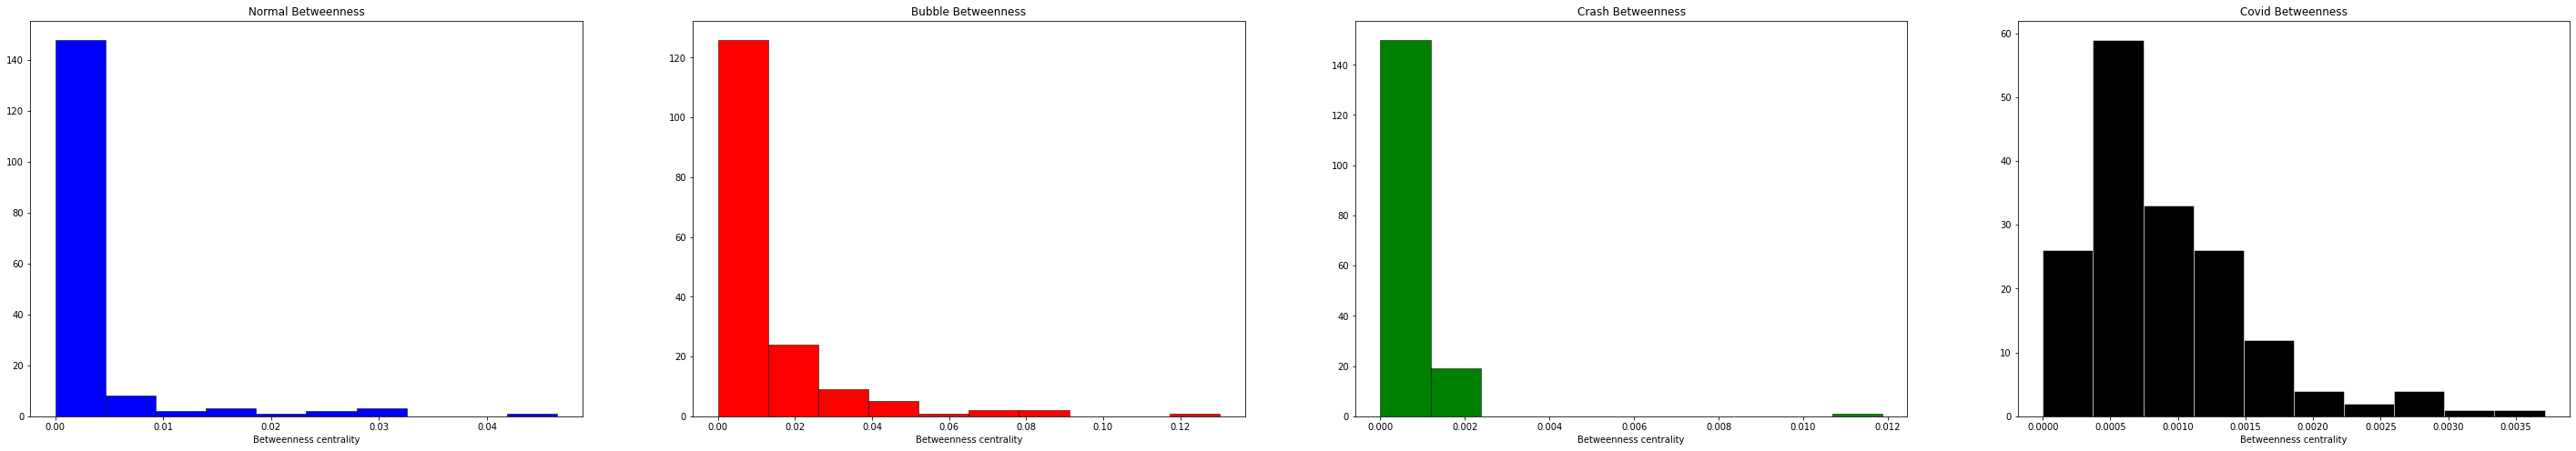

In [26]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(betweenness_normal.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Betweenness')
ax1.set_xlabel('Betweenness centrality')
ax2.hist(betweenness_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Betweenness')
ax2.set_xlabel('Betweenness centrality')
ax3.hist(betweenness_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Betweenness')
ax3.set_xlabel('Betweenness centrality')
ax4.hist(betweenness_covid.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Betweenness')
ax4.set_xlabel('Betweenness centrality')
plt.savefig("plots\\distribution_betweenness.pdf", format="pdf", bbox_inches="tight")
plt.show()

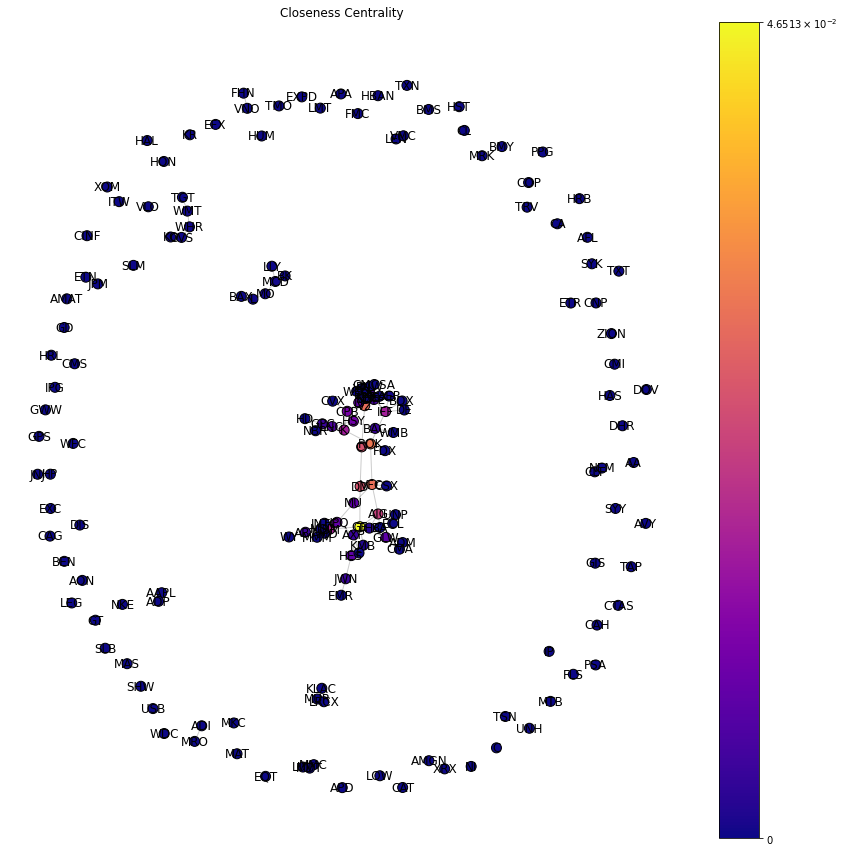

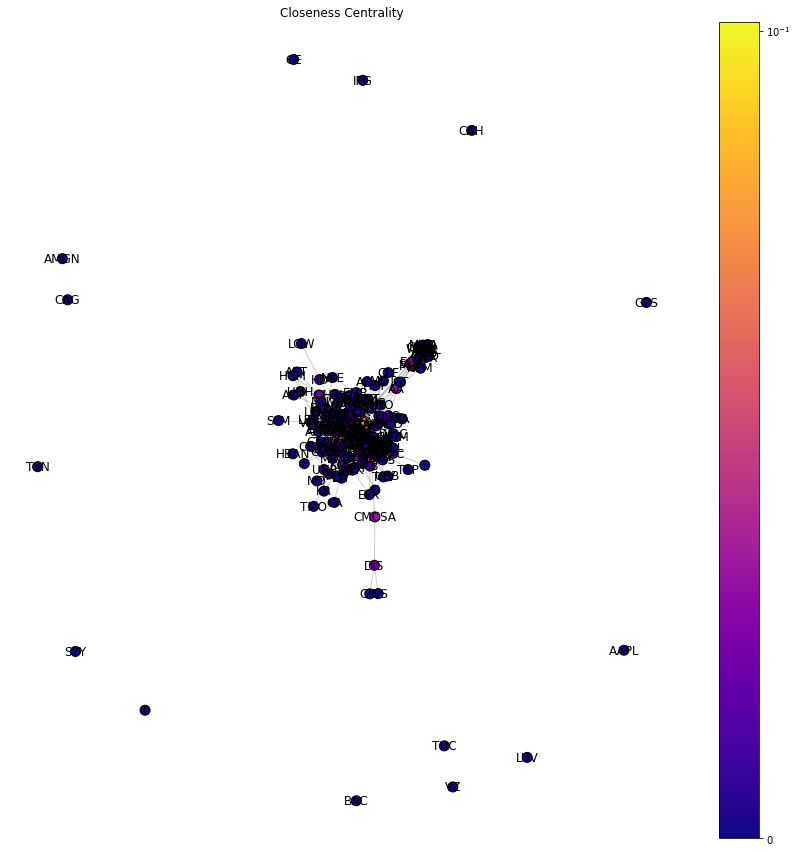

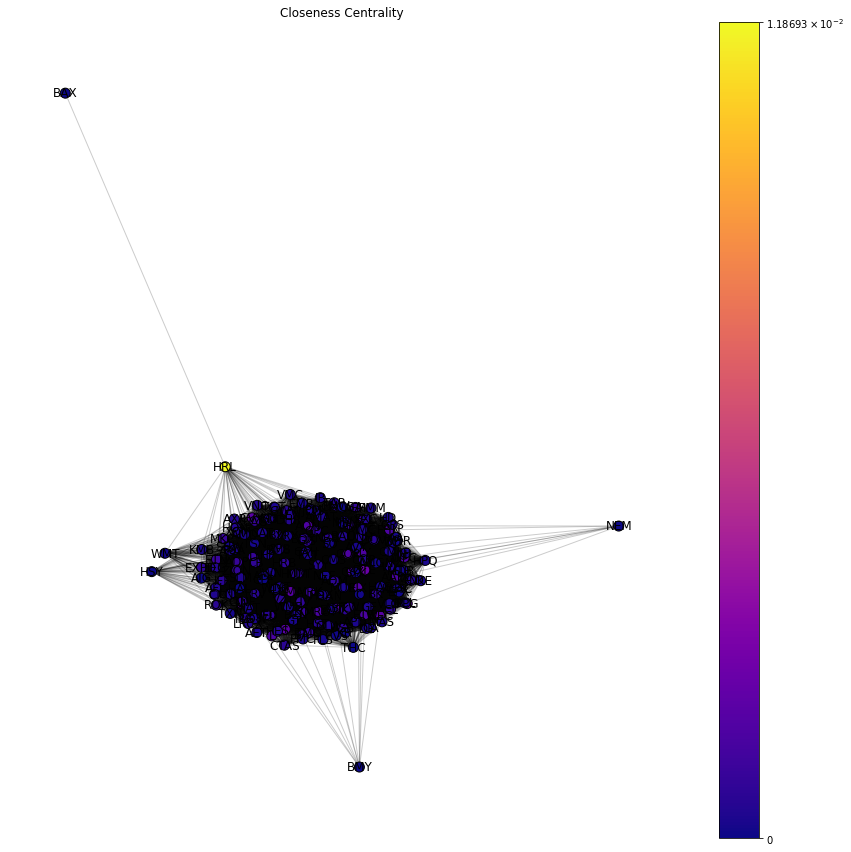

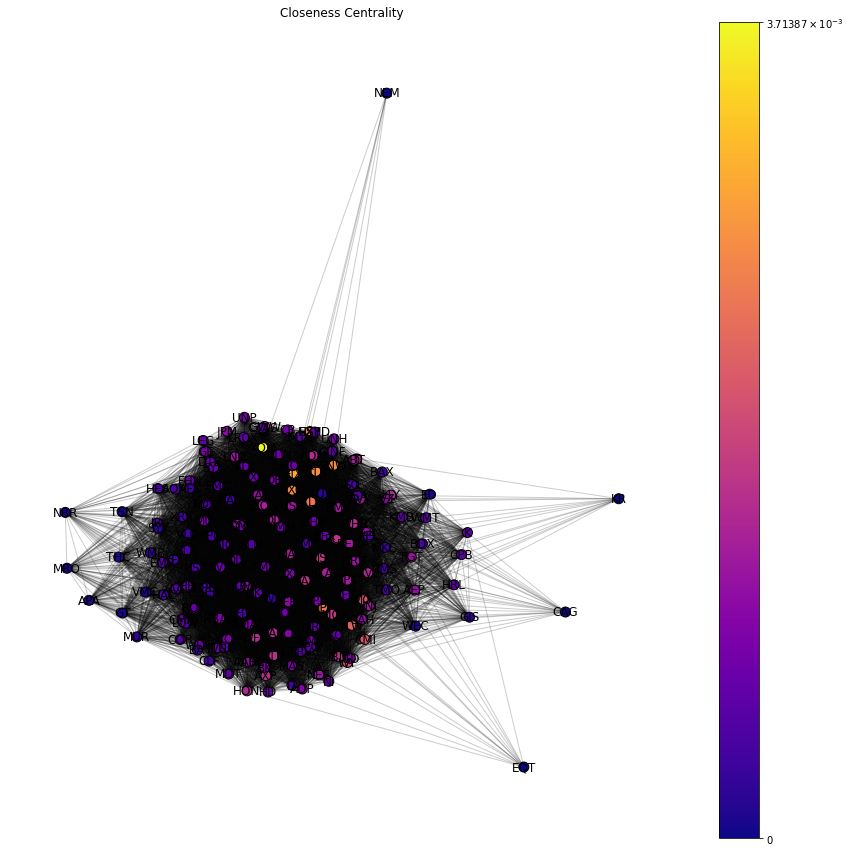

In [82]:
draw_net(list_graph[0], betweenness_normal, 'Betweenness Centrality')
draw_net(list_graph[1], betweenness_bubble, 'Betweenness Centrality')
draw_net(list_graph[2], betweenness_crash, 'Betweenness Centrality')
draw_net(list_graph[3], betweenness_covid, 'Betweenness Centrality')

### Harmonic Centrality


In [27]:
harmonic_normal = nx.harmonic_centrality(list_graph[0])
harmonic_bubble = nx.harmonic_centrality(list_graph[1])
harmonic_crash = nx.harmonic_centrality(list_graph[2])
harmonic_covid = nx.harmonic_centrality(list_graph[3])
harmonic_normal = {k: v for k, v in sorted(harmonic_normal.items(), key=lambda item: item[1],reverse=True)}
harmonic_bubble = {k: v for k, v in sorted(harmonic_bubble.items(), key=lambda item: item[1],reverse=True)}
harmonic_crash = {k: v for k, v in sorted(harmonic_crash.items(), key=lambda item: item[1],reverse=True)}
harmonic_covid = {k: v for k, v in sorted(harmonic_covid.items(), key=lambda item: item[1],reverse=True)}

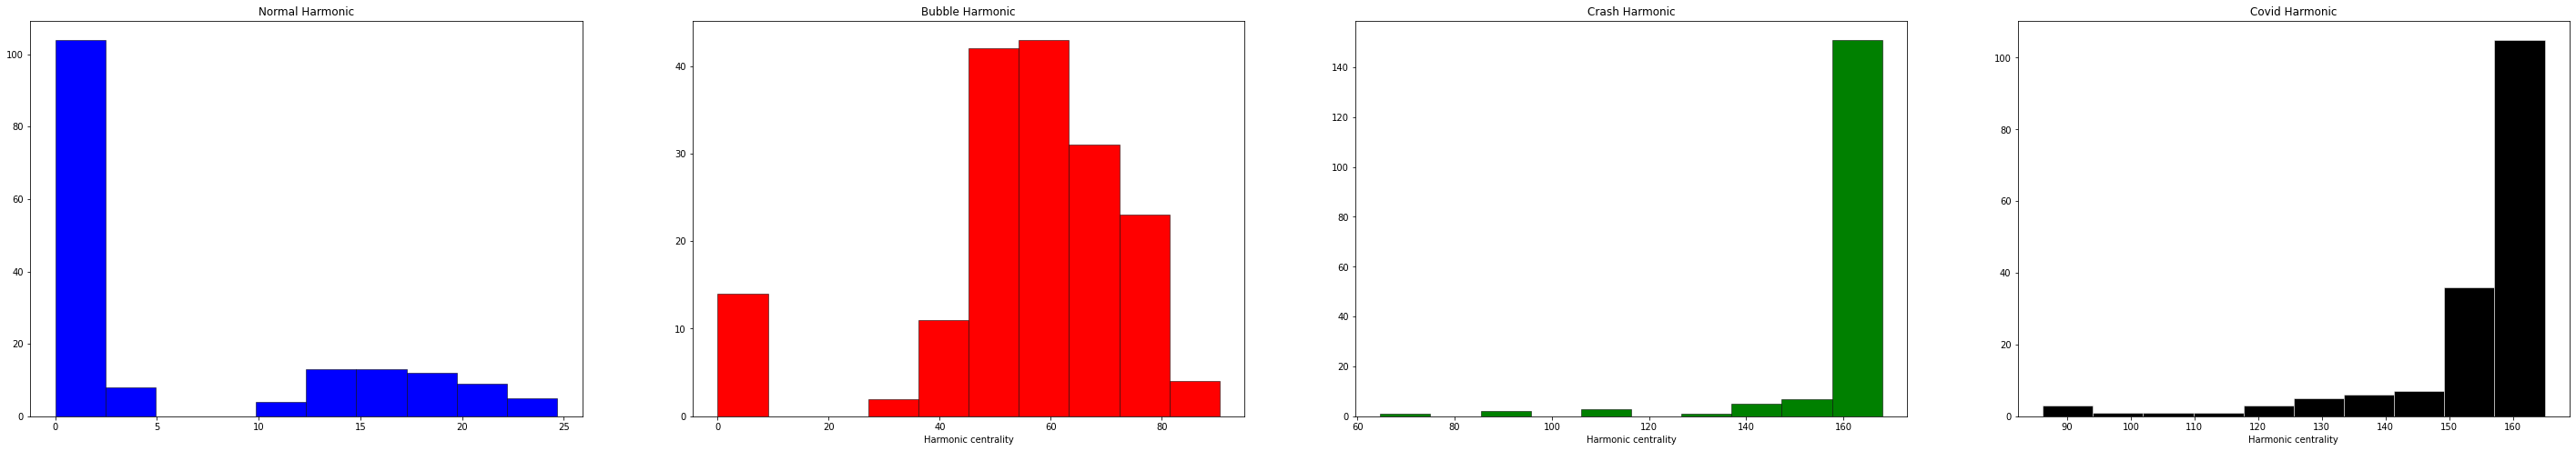

In [28]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(harmonic_normal.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Harmonic')
ax2.set_xlabel('Harmonic centrality')
ax2.hist(harmonic_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Harmonic')
ax2.set_xlabel('Harmonic centrality')
ax3.hist(harmonic_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Harmonic')
ax3.set_xlabel('Harmonic centrality')
ax4.hist(harmonic_covid.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Harmonic')
ax4.set_xlabel('Harmonic centrality')
plt.savefig("plots\\distribution_harmonic.pdf", format="pdf", bbox_inches="tight")
plt.show()

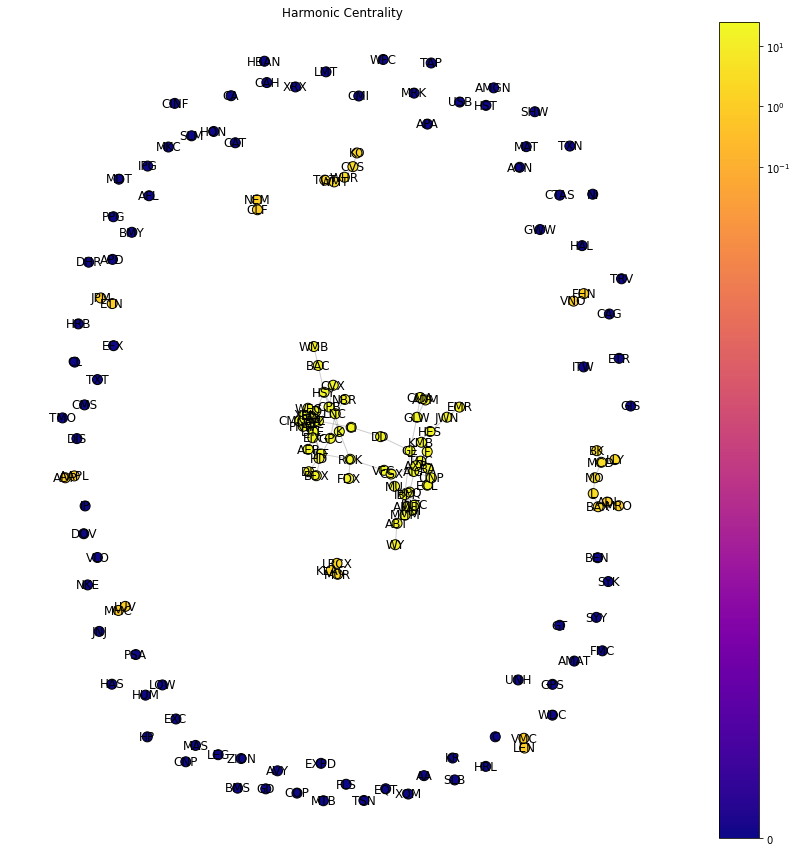

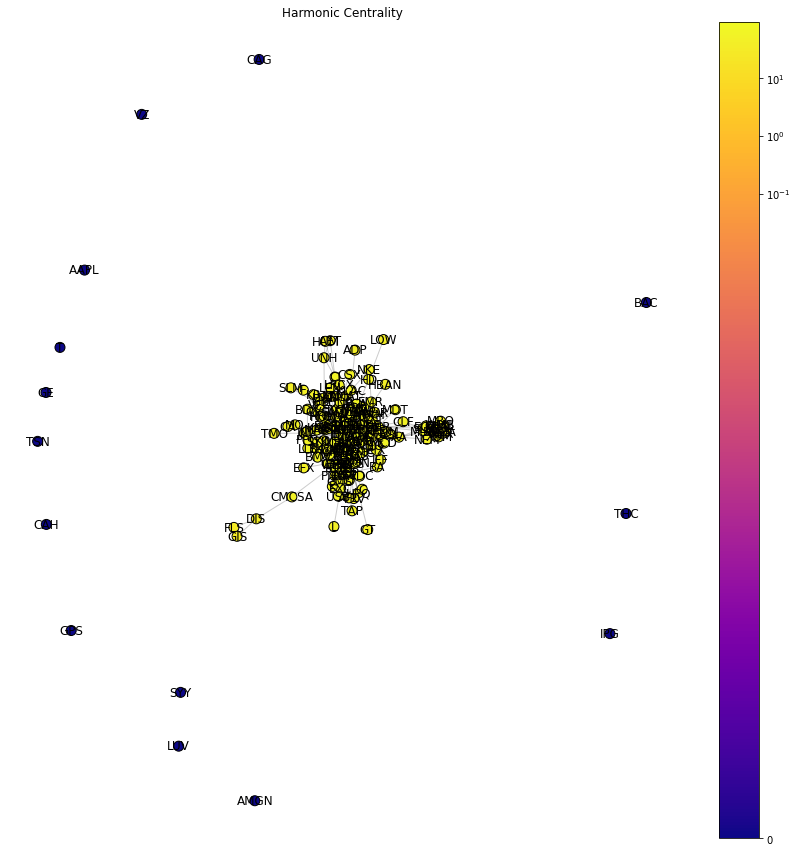

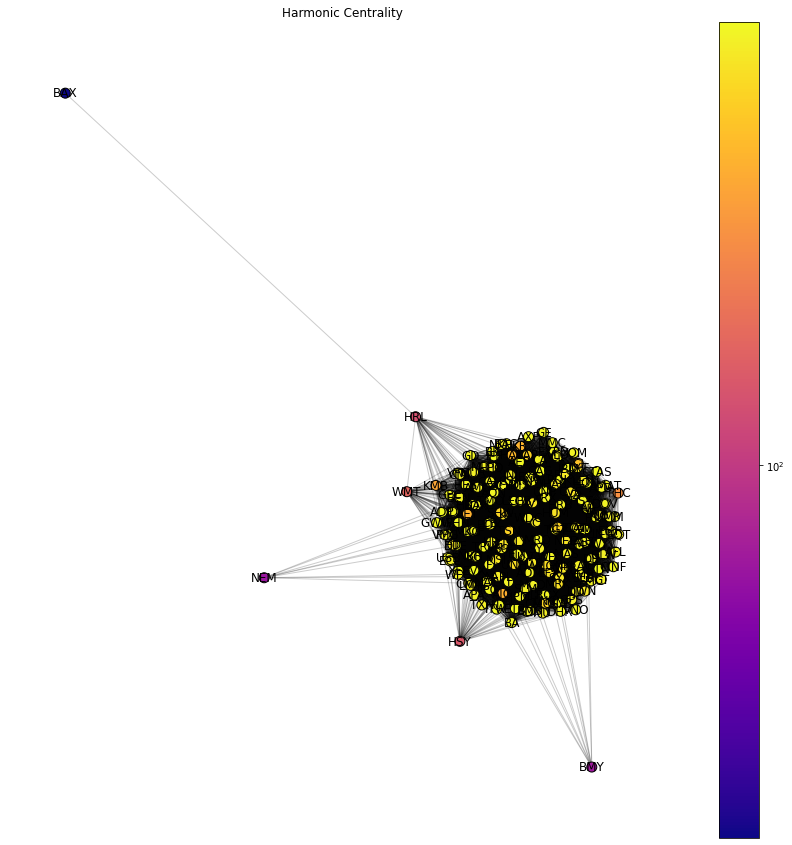

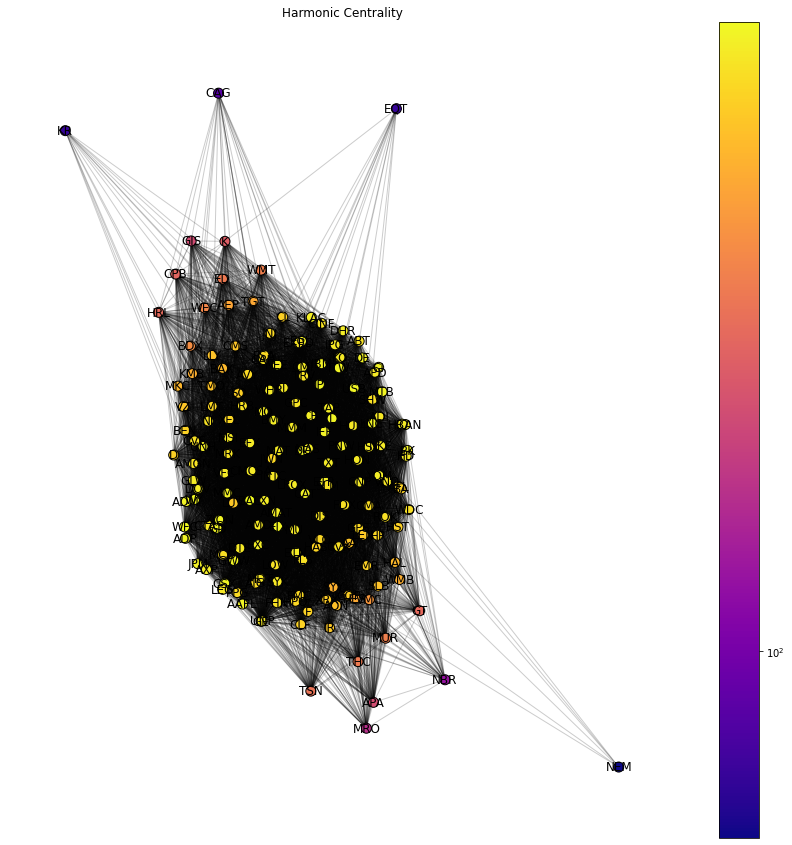

In [87]:
draw_net(list_graph[0], harmonic_normal, 'Harmonic Centrality')
draw_net(list_graph[1], harmonic_bubble, 'Harmonic Centrality')
draw_net(list_graph[2], harmonic_crash, 'Harmonic Centrality')
draw_net(list_graph[3], harmonic_covid, 'Harmonic Centrality')

### Eigenvector

In [29]:
eigen_normal = nx.eigenvector_centrality(list_graph[0])
eigen_bubble = nx.eigenvector_centrality(list_graph[1])
eigen_crash = nx.eigenvector_centrality(list_graph[2])
eigen_covid = nx.eigenvector_centrality(list_graph[3])

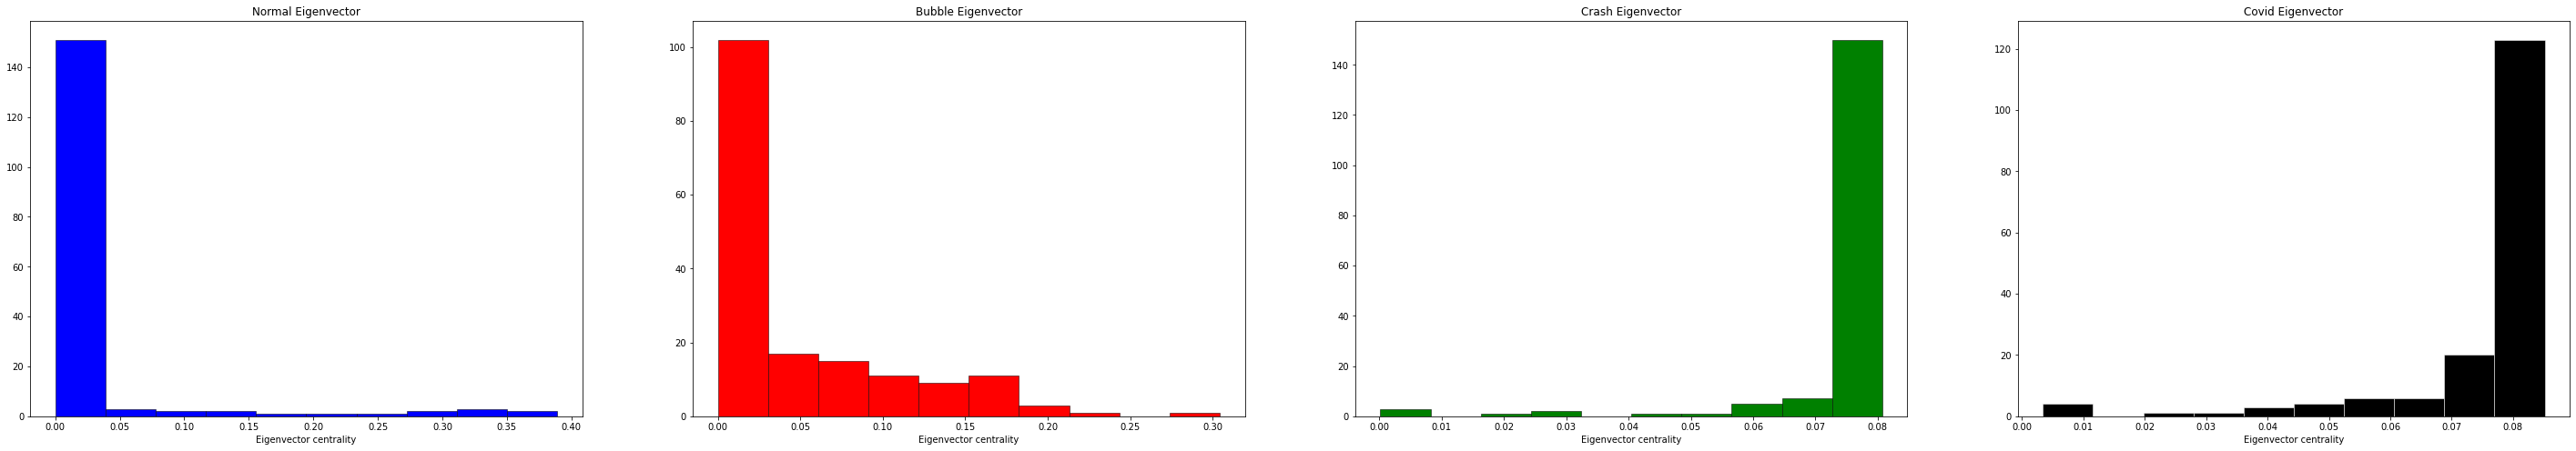

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(50, 8))
ax1.hist(eigen_normal.values(),facecolor = 'blue', edgecolor='black', linewidth=0.5)
ax1.set_title('Normal Eigenvector')
ax1.set_xlabel('Eigenvector centrality')
ax2.hist(eigen_bubble.values(),facecolor = 'red', edgecolor='black', linewidth=0.5)
ax2.set_title('Bubble Eigenvector')
ax2.set_xlabel('Eigenvector centrality')
ax3.hist(eigen_crash.values(),facecolor = 'green', edgecolor='black', linewidth=0.5)
ax3.set_title('Crash Eigenvector')
ax3.set_xlabel('Eigenvector centrality')
ax4.hist(eigen_covid.values(),facecolor = 'black', edgecolor='white', linewidth=0.5)
ax4.set_title('Covid Eigenvector')
ax4.set_xlabel('Eigenvector centrality')
plt.savefig("plots\\distribution_eigen.pdf", format="pdf", bbox_inches="tight")
plt.show()

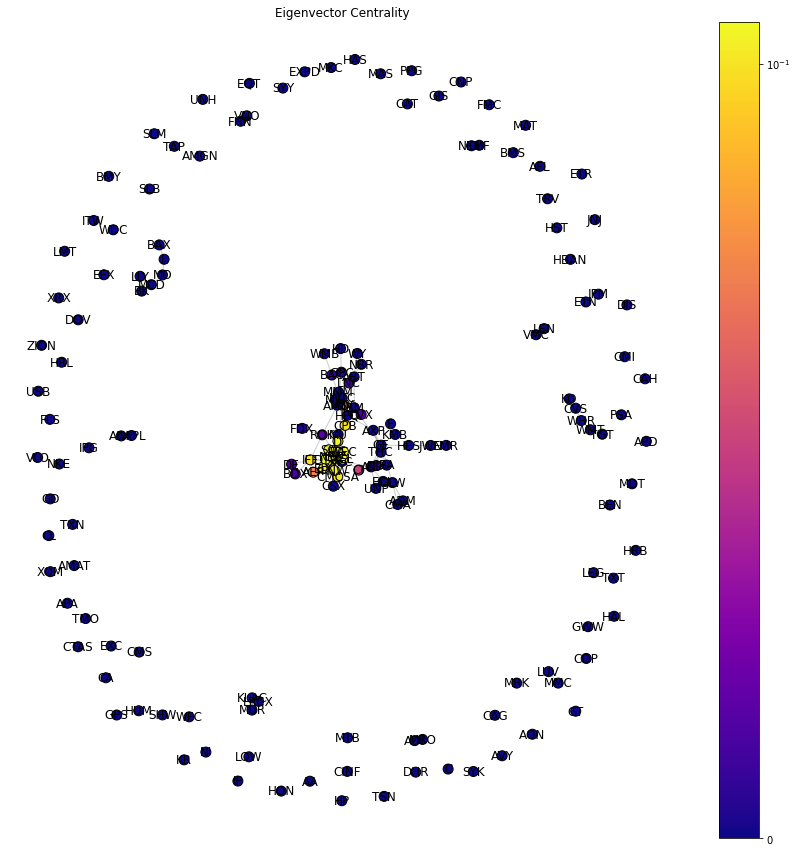

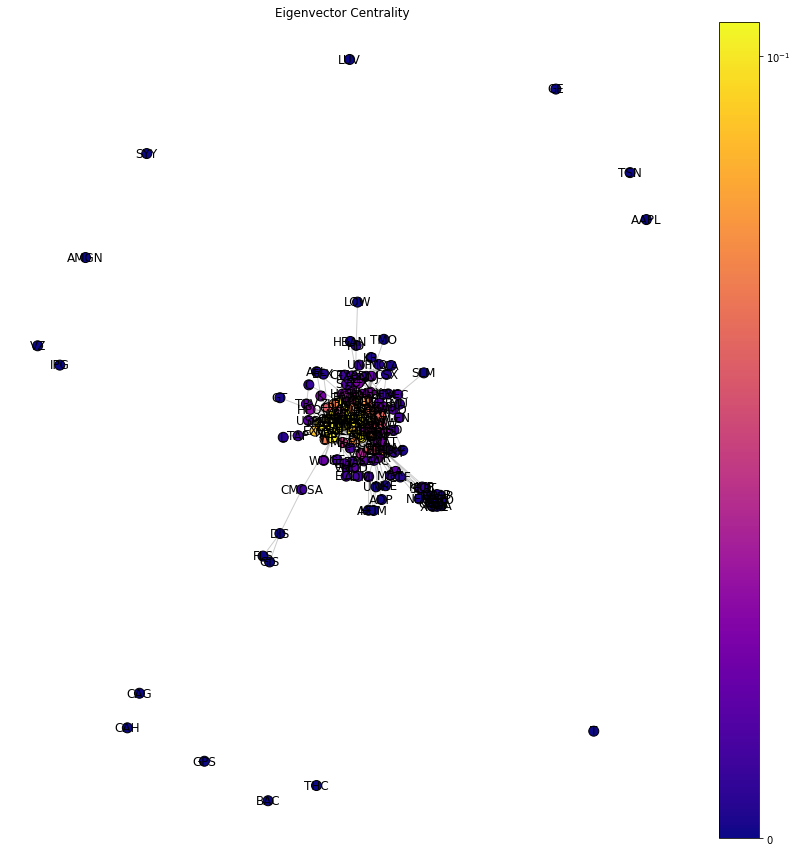

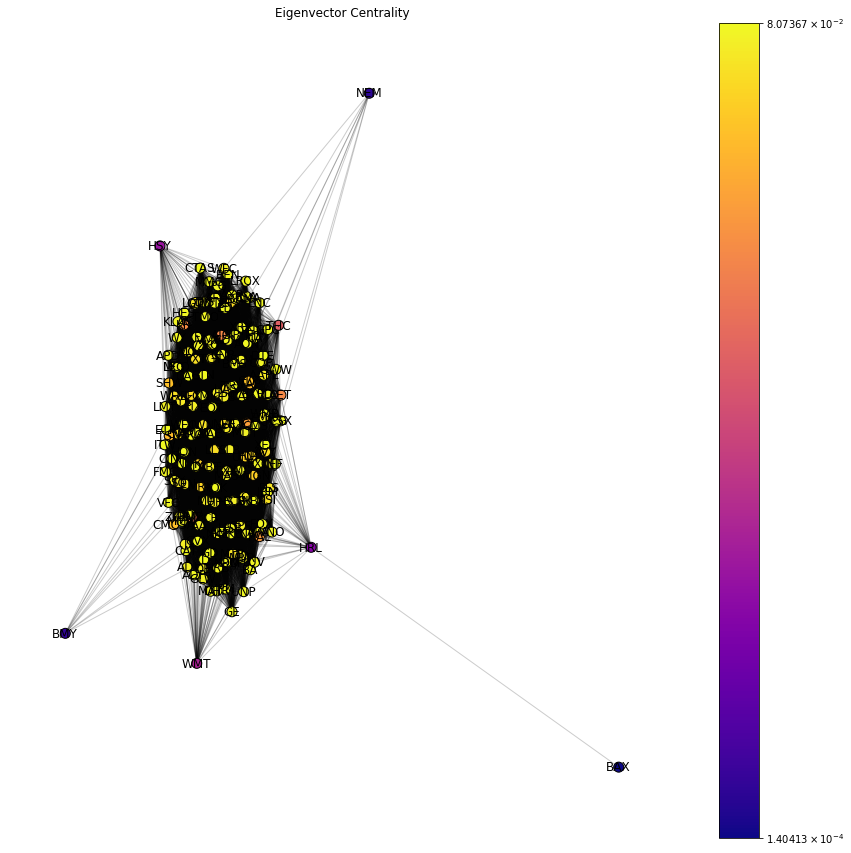

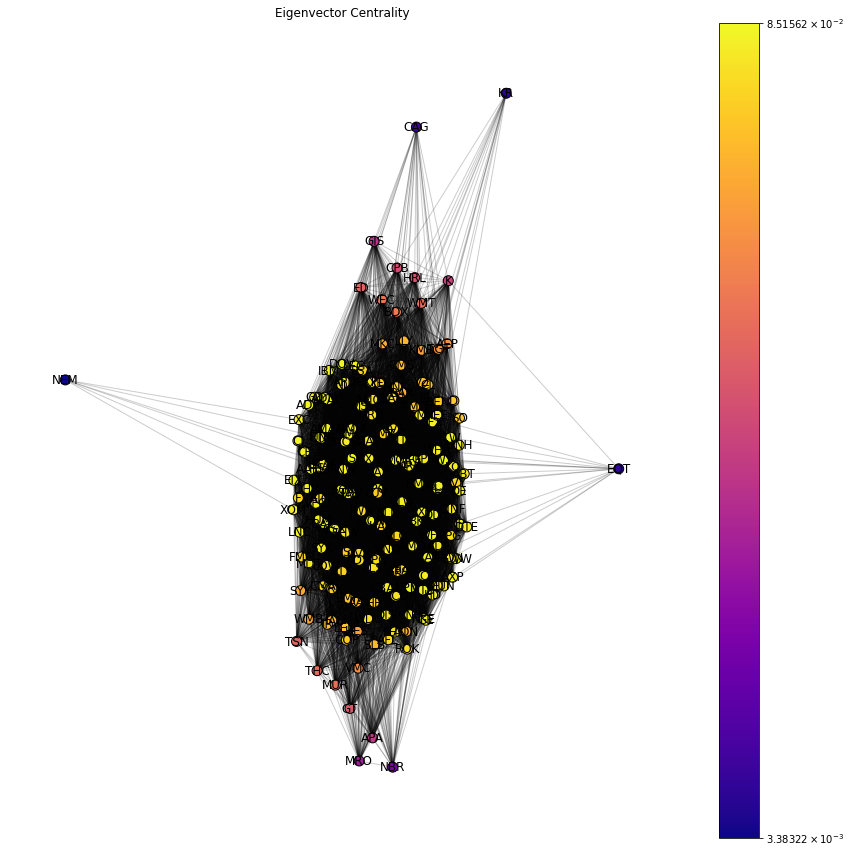

In [91]:
draw_net(list_graph[0], eigen_normal, 'Eigenvector Centrality')
draw_net(list_graph[1], eigen_bubble, 'Eigenvector Centrality')
draw_net(list_graph[2], eigen_crash, 'Eigenvector Centrality')
draw_net(list_graph[3], eigen_covid, 'Eigenvector Centrality')

In [31]:
print(f'Normal assortativity:{nx.degree_assortativity_coefficient(list_graph[0]):.2f}' 
      f'\t Bubble assortativity:{nx.degree_assortativity_coefficient(list_graph[1]):.2f}'
      f'\t Crash assortativity:{nx.degree_assortativity_coefficient(list_graph[2]):.2f}'
      f'\t Covid assortativity:{nx.degree_assortativity_coefficient(list_graph[3]):.2f}')

Normal assortativity:0.43	 Bubble assortativity:0.13	 Crash assortativity:-0.04	 Covid assortativity:-0.02
